<a href="https://colab.research.google.com/github/Crayfi/Datasets/blob/main/TimeMachineSkaters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade timemachines

     |████████████████████████████████| 139 kB 5.5 MB/s 
     |████████████████████████████████| 68 kB 3.8 MB/s 
     |████████████████████████████████| 173 kB 41.5 MB/s 
  Created wheel for contexttimer: filename=contexttimer-0.3.3-py3-none-any.whl size=5818 sha256=a9393e9bb38cd72bee2e65aa0487da0b976c7a6429e6e3a0cf7fbed724e91c72
  Stored in directory: /root/.cache/pip/wheels/03/8c/3b/8eba5888c3218e78f7fc4442198abb6db2bd1125c1bfcff183
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=cd97b19d180665a8b67507419b090045490d3f7e05f2883f73e0a9d3e4c6224a
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
  Created wheel for accumulation-tree: filename=accumulation_tree-0.6.2-cp37-cp37m-linux_x86_64.whl size=234406 sha256=f3798864e7887908c53aec6a697a9d66690bf98199ce6bfe708c8fcdafc7d042
  Stored in directory: /root/.cache/pip/wheels/42/32/0e/08020ae396bf92a3fd00971d0b81a6fb8f3e0681fd8912760d


In [13]:
import pandas as pd

try:
  file = open('buy_average_fill_clean.csv', 'r')
  df = pd.read_csv(file, error_bad_lines=False)
  file2 = open('buy_quantity_clean.csv', 'r')
  df_buy_quantity = pd.read_csv(file2, error_bad_lines=False)
except:
  try:
    file = open('buy_average_fill.csv', 'r')
    df = pd.read_csv(file, error_bad_lines=False)
    file2 = open('buy_quantity.csv', 'r')
    df_buy_quantity = pd.read_csv(file2, error_bad_lines=False)
    #make first row of quantity 1s
    df_buy_quantity.iloc[0] = [1]*len(df_buy_quantity.columns)
    #remove duplicate entries
    drop = []
    for i in range(1, len(df)):
      duplicates = [df.values[i][x] == df.values[i-1][x] for x in range(2, len(df.columns)) ]
      if np.all(duplicates):
        drop.append(i)
    for i in drop:
      df = df.drop([i])
      df_buy_quantity = df_buy_quantity.drop([i])
      
    df.to_csv('buy_average_fill_clean.csv')
    df_buy_quantity.to_csv('buy_quantity_clean.csv')
  except:
    try:
      file = open('buy_average.csv', 'r')
      df = pd.read_csv(file, error_bad_lines=False)

      def fill_zeros(x):
        # make first row all 1s
        x.iloc[0] = [1]*len(x.columns)

        # fill zeros in with previous price
        for i in x.columns:
          for j in range(len(x)):
            #TODO update with historical data later
            if (x[i][j] == 0 ):
              x[i][j] = x[i][j-1]
        return x

      df = fill_zeros(df)
      df.to_csv('buy_average_fill.csv')
    except:
      print('Can\'t locate buy_average or buy_quantity ')

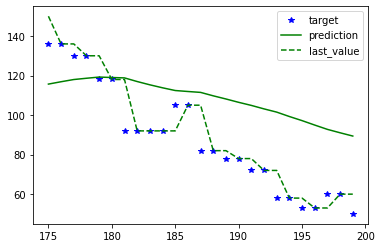

In [2]:
from timemachines.skaters.simple.thinking import thinking_slow_and_slow
from timemachines.skatertools.visualization.priorplot import prior_plot
from timemachines.skatertools.data.real import hospital
import matplotlib.pyplot as plt
y = hospital(n=200)
prior_plot(f=thinking_slow_and_slow,y=y)
plt.show()

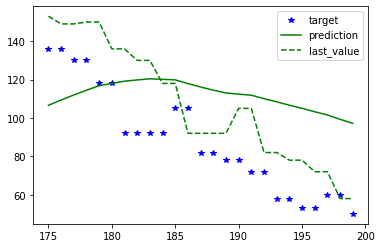

In [17]:
y = hospital(n=200)
prior_plot(f=thinking_slow_and_slow,y=y,k=5)
plt.show()

In [18]:
y

[146.0,
 126.0,
 126.0,
 124.0,
 124.0,
 157.0,
 157.0,
 155.0,
 155.0,
 230.0,
 230.0,
 265.0,
 265.0,
 221.0,
 221.0,
 194.0,
 194.0,
 181.0,
 248.0,
 248.0,
 248.0,
 214.0,
 214.0,
 172.0,
 172.0,
 201.0,
 201.0,
 216.0,
 216.0,
 179.0,
 179.0,
 232.0,
 232.0,
 202.0,
 202.0,
 195.0,
 195.0,
 190.0,
 190.0,
 185.0,
 185.0,
 201.0,
 201.0,
 221.0,
 221.0,
 214.0,
 214.0,
 213.0,
 213.0,
 215.0,
 215.0,
 199.0,
 199.0,
 183.0,
 183.0,
 201.0,
 201.0,
 197.0,
 197.0,
 181.0,
 181.0,
 177.0,
 177.0,
 193.0,
 193.0,
 179.0,
 179.0,
 192.0,
 192.0,
 177.0,
 177.0,
 187.0,
 187.0,
 177.0,
 177.0,
 201.0,
 201.0,
 209.0,
 209.0,
 202.0,
 202.0,
 188.0,
 188.0,
 145.0,
 145.0,
 139.0,
 139.0,
 150.0,
 150.0,
 136.0,
 136.0,
 114.0,
 114.0,
 96.0,
 96.0,
 78.0,
 78.0,
 56.0,
 56.0,
 53.0,
 53.0,
 50.0,
 50.0,
 43.0,
 43.0,
 37.0,
 37.0,
 43.0,
 43.0,
 53.0,
 53.0,
 58.0,
 58.0,
 60.0,
 60.0,
 50.0,
 50.0,
 42.0,
 42.0,
 40.0,
 40.0,
 36.0,
 36.0,
 42.0,
 42.0,
 39.0,
 39.0,
 30.0,
 30.0,
 14.

In [23]:
list(df.Cannonball.values[1:].to_array())

AttributeError: ignored

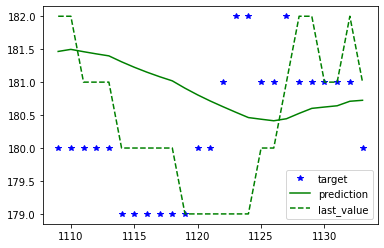

In [24]:

y = df.Cannonball.values[1:].tolist()
prior_plot(f=thinking_slow_and_slow,y=y,k=5)
plt.show()